# Test de la nouvelle classe TimeProblem

In [1]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path
savefig_path = os.path.join(lib_path, "figures/")
save_fig = False

In [2]:
from src.main_discontinu import *
from src.plot_fields import *
from src.time_problem import *
from src.plot_stats import *

%matplotlib inline
rc("figure", figsize=(10, 5))
rc("figure", dpi=100)
rc("font", size=18)
rc("legend", fontsize=16)
rc("text.latex", preamble=r"\usepackage{siunitx}")

## Test des 3 opérateurs à maillage constant

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en WENO avec Euler explicite en temps.

In [3]:
n_lim = 10**8
t_fin_lim = 0.01

In [4]:
# d = 6./100*Delta/2.
dx = 3.9 * 10**-5
phy_prop_conv = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)
phy_prop_no_conv = PhysicalProperties(
    Delta=0.02,
    v=0.0,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.2,
    a_i=357.0,
)
num_prop_weno = NumericalProperties(
    dx=dx, schema="weno", time_scheme="euler", phy_prop=phy_prop_conv, cfl=0.5
)
num_prop_quick = NumericalProperties(
    dx=dx, schema="quick", time_scheme="euler", phy_prop=phy_prop_conv, cfl=0.5
)
num_prop_upwind = NumericalProperties(
    dx=dx, schema="upwind", time_scheme="euler", phy_prop=phy_prop_conv, cfl=0.5
)
# markers = Bulles(phy_prop=phy_prop_conv, x=num_prop.x, n_bulle=1)
markers = Bulles(phy_prop=phy_prop_conv, n_bulle=1)


TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30

TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30

TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30

TOF
===
dt fourier
6.918433404737903e-06
Db / dx = 30


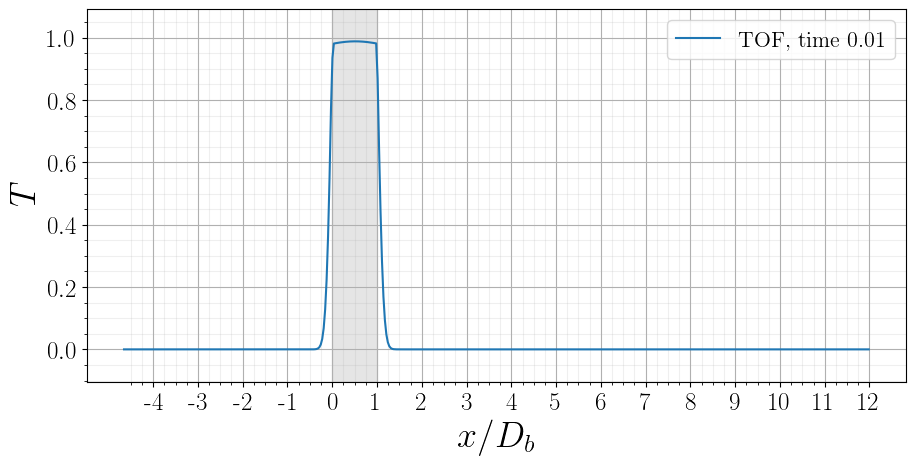

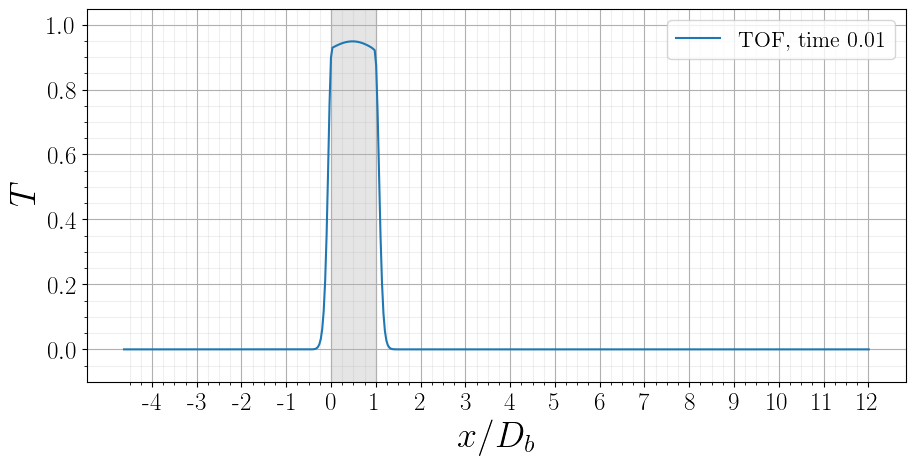

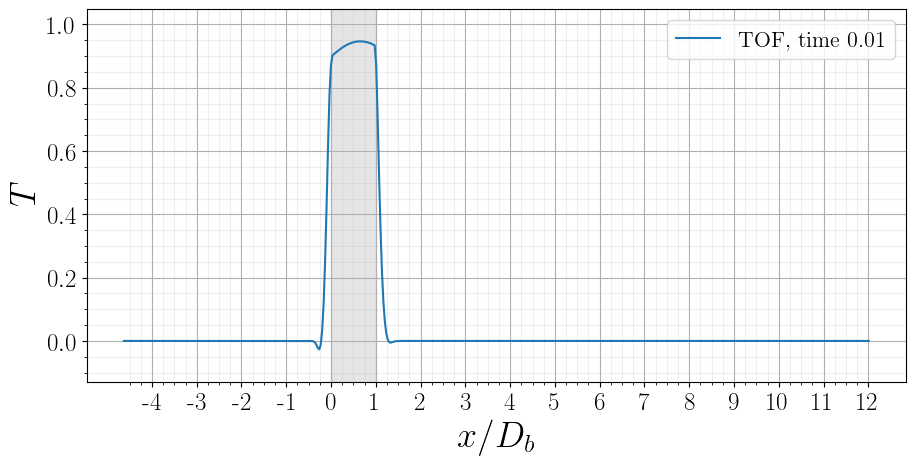

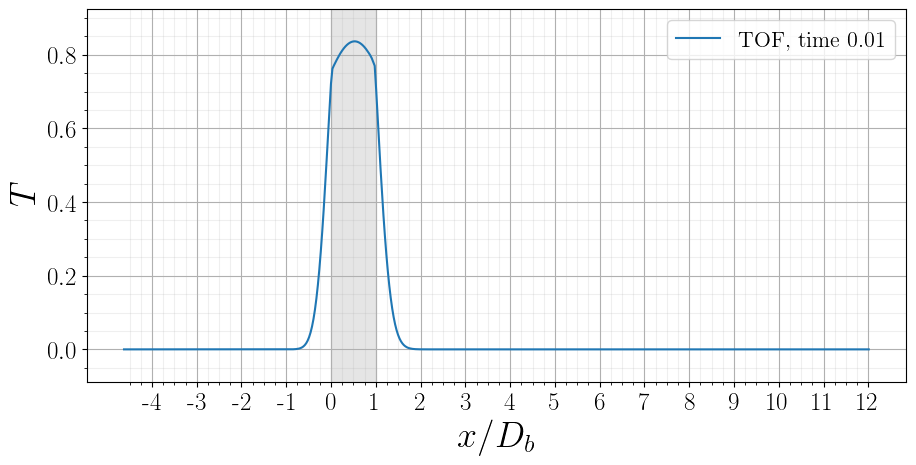

In [5]:
t_fin = 10.

prob_clean_weno_ref = TimeProblem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_no_conv, num_prop=num_prop_weno
)
t, e = prob_clean_weno_ref.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=Plotter('decale', ispretty=True),
)
prob_clean_weno = TimeProblem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_weno
)
t, e = prob_clean_weno.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=Plotter('decale', ispretty=True),
)

prob_clean_quick = TimeProblem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_quick
)
t, e = prob_clean_quick.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=Plotter('decale', ispretty=True),
)

prob_clean_upwind = TimeProblem(
    get_T_creneau, markers=markers, phy_prop=phy_prop_conv, num_prop=num_prop_upwind
)
t, e = prob_clean_upwind.timestep(
    t_fin=min(t_fin, t_fin_lim), n=n_lim, number_of_plots=1, plotter=Plotter('decale', ispretty=True),
)

'#d62728'

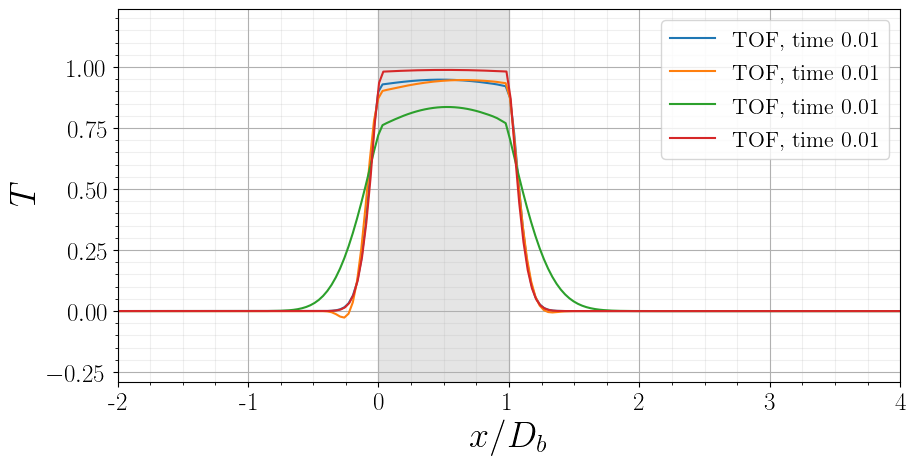

In [6]:
plot = Plotter('decale', ispretty=True, zoom=(-2,4))
plot.plot(prob_clean_weno.problem_state)
plot.plot(prob_clean_quick.problem_state)
plot.plot(prob_clean_upwind.problem_state)
plot.plot(prob_clean_weno_ref.problem_state)


Calcul sans label
dE*/dt* = -1.95357e-05

Calcul sans label
dE*/dt* = -2.28978e-05

Calcul sans label
dE*/dt* = -8.43502e-05


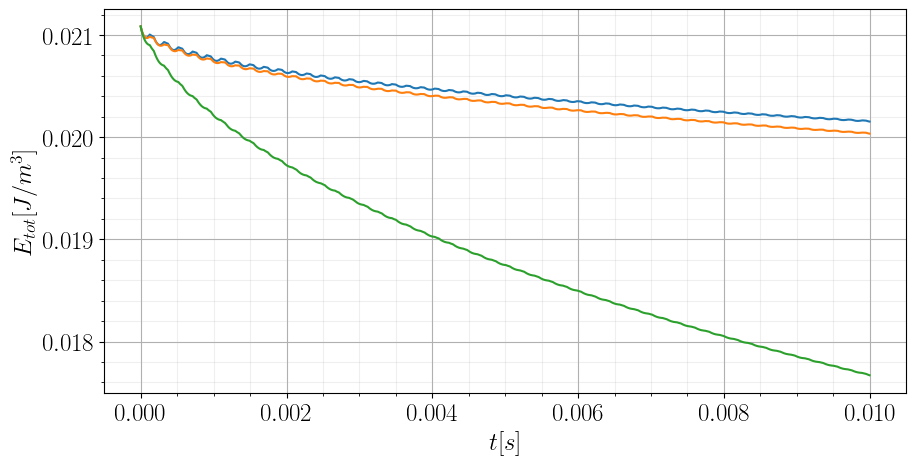

In [7]:
plot_en = EnergiePlot()
plot_en.plot_stat(prob_clean_weno.stat)
plot_en.plot_stat(prob_clean_quick.stat)
plot_en.plot_stat(prob_clean_upwind.stat)


$T_l$, TOF
dT/dt = 0.666256

$T_v$, TOF
dT/dt = -3.86752

$T_l$, TOF
dT/dt = 0.684074

$T_v$, TOF
dT/dt = -4.3814

$T_l$, TOF
dT/dt = 1.30362

$T_v$, TOF
dT/dt = -14.2344


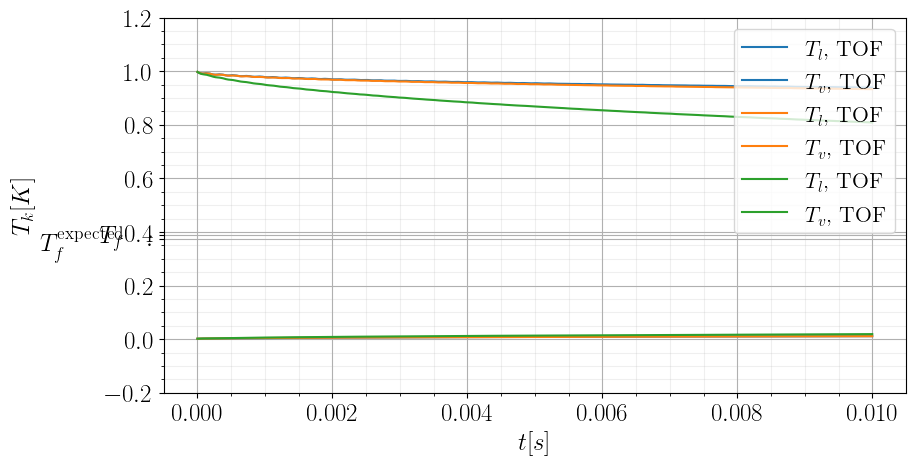

In [8]:
plot_T = TemperaturePlot()
plot_T.plot_tpb(prob_clean_weno)
plot_T.plot_tpb(prob_clean_quick)
plot_T.plot_tpb(prob_clean_upwind)
plot_T.add_T_final()

In [9]:
def plot_dTdt(stat, plot, **args):
    dTdt = np.gradient(stat.Tv, stat.t)
    plot.ax.plot(stat.t, dTdt, **args)

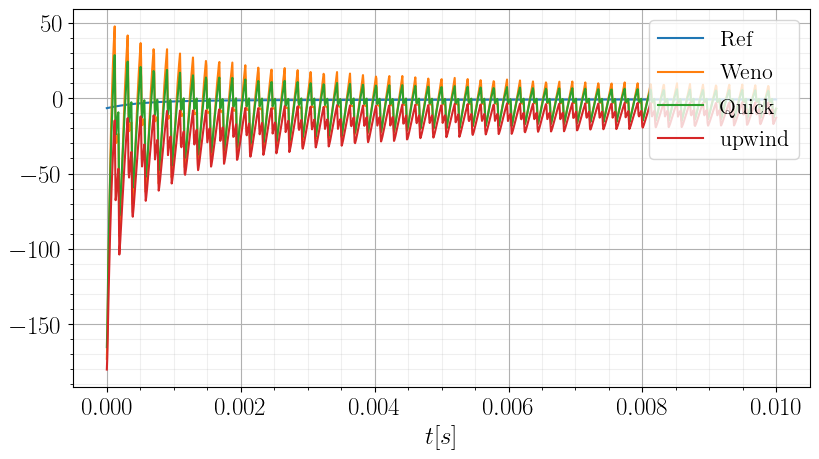

In [10]:
plot_dT = TimePlot()
plot_dTdt(prob_clean_weno_ref.stat, plot_dT, label='Ref')
plot_dTdt(prob_clean_weno.stat, plot_dT, label='Weno')
plot_dTdt(prob_clean_quick.stat, plot_dT, label='Quick')
plot_dTdt(prob_clean_upwind.stat, plot_dT, label='upwind')
le = plot_dT.ax.legend()